In [1]:
#Loading in the Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Reading in the Data

In [2]:
business_table = pd.read_csv("Businesses table (1) (1).csv")

In [3]:
business_table.head()

,business_uuid,date_won,city,business_type,sub_group,partner_pos
0,1441080511293-5ce45dcd-b3ce-4dd9-9e6d-4047a667...,9/17/2015,Cape Town,sole_proprietor,Retail,0
1,1443451760034-b317d70b-47b3-44cc-8238-bc93474e...,9/28/2015,Randburg,sole_proprietor,"Food, Drink & Hospitality",0
2,1446269527540-68231650-1320-4ff9-943f-28412f8b...,11/6/2015,Cape Town,sole_proprietor,Retail,0
3,1446732341500-16b51c71-bf68-428d-a198-b63a8a97...,11/12/2015,Cape Town,sole_proprietor,Retail,0
4,1407937721690-22878388-e481-46cb-8384-5dea1658...,1/14/2015,Cape Town,NaN,"Food, drink and hospitality",0


In [4]:
business_table.shape

(722, 6)

In [5]:
business_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   business_uuid  722 non-null    object
 1   date_won       722 non-null    object
 2   city           719 non-null    object
 3   business_type  698 non-null    object
 4   sub_group      722 non-null    object
 5   partner_pos    722 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 34.0+ KB


In [6]:
transaction_subset = pd.read_csv("transaction_subset (1) (1).csv")

In [7]:
transaction_subset.head()

,transaction_uuid,business_uuid,created,transaction_type,amount_usd,transaction_state,processing_time,phone_type,reader_type,connection_type
0,1424437465609-285a18be-f2fa-4d4c-a2ef-3bef9f3e...,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,2015-02-20 13:04:25.607+00,credit_card,60.0,approved,18.68068,NaN,NaN,NaN
1,1444994656054-91a37566-c9ce-435a-ae8f-5f9aeb27...,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-10-16 11:24:16.052+00,credit_card,220.0,approved,16.37625,ios,E105,WiFi
2,1451311977458-d794c535-d696-4830-b4b6-93c52ca5...,1442575726431-a066cad9-8f66-45da-abd8-165ce0a7...,2015-12-28 14:12:57.455+00,credit_card,90.0,approved,13.51605,ios,E105,WiFi
3,1444763353752-bac376b0-80d9-46f5-9e21-9def71ee...,1436133508444-8d874705-6448-4d8d-88e0-5b0f8f4c...,2015-10-13 19:09:13.75+00,credit_card,135.0,approved,15.06118,ios,M010,WiFi
4,1449883535047-1a9e1d5e-6151-4593-86db-bf504ab7...,1436123092750-68fb87cc-d43b-4468-9137-2841db30...,2015-12-12 01:25:35.047+00,credit_card,162.0,approved,14.81583,ios,M010,WiFi


In [8]:
transaction_subset.shape

(15391, 10)

In [9]:
transaction_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15391 entries, 0 to 15390
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_uuid   15391 non-null  object 
 1   business_uuid      15390 non-null  object 
 2   created            15390 non-null  object 
 3   transaction_type   15390 non-null  object 
 4   amount_usd         15390 non-null  float64
 5   transaction_state  15390 non-null  object 
 6   processing_time    13749 non-null  float64
 7   phone_type         10851 non-null  object 
 8   reader_type        9526 non-null   object 
 9   connection_type    9373 non-null   object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


### Cleaning the Data

#### Issues
`business_table`
1. Convert the date_won column to a datetime object
2. The Food, Drink and hospitality in Business_type should be changed to "Food, Drink and Hospitality"

`transaction_subset`

1. Missing values in Processing time
2. Drop unnecessary columns for this dataset: phone_type,reader_type,connection_type
3. Convert  created column to a datetime object.

In [10]:
business_table['sub_group'].value_counts()

Food, drink and hospitality       238
Retail                            171
Healthcare, beauty and fitness     67
Professional services              62
Home and repair                    62
Leisure and entertainment          37
Travel and tourism                 34
Online                             33
Personal services                   7
Food, Drink & Hospitality           6
Transportation                      5
Name: sub_group, dtype: int64

In [11]:
#Replace food,drink and hospitality with " Food,Drink & Hospitality"
business_table['sub_group'] = business_table['sub_group'].replace(
    {"Food, drink and hospitality":"Food, Drink & Hospitality"})

business_table['sub_group'].value_counts()

Food, Drink & Hospitality         244
Retail                            171
Healthcare, beauty and fitness     67
Professional services              62
Home and repair                    62
Leisure and entertainment          37
Travel and tourism                 34
Online                             33
Personal services                   7
Transportation                      5
Name: sub_group, dtype: int64

In [12]:
#Converting the date_won column to a datetime object
business_table['date_won'] = pd.to_datetime(business_table['date_won'])

In [13]:
business_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   business_uuid  722 non-null    object        
 1   date_won       722 non-null    datetime64[ns]
 2   city           719 non-null    object        
 3   business_type  698 non-null    object        
 4   sub_group      722 non-null    object        
 5   partner_pos    722 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 34.0+ KB


In [14]:
#Dropping the Unnecessary columns in the transaction_subset
transaction_subset.drop(['phone_type','reader_type','connection_type'],axis=1,inplace=True)

In [15]:
#Converting the Created column to a datetime object
transaction_subset['created'] = pd.to_datetime(transaction_subset['created'])



In [16]:
transaction_subset.head()

,transaction_uuid,business_uuid,created,transaction_type,amount_usd,transaction_state,processing_time
0,1424437465609-285a18be-f2fa-4d4c-a2ef-3bef9f3e...,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,2015-02-20 13:04:25.607000+00:00,credit_card,60.0,approved,18.68068
1,1444994656054-91a37566-c9ce-435a-ae8f-5f9aeb27...,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-10-16 11:24:16.052000+00:00,credit_card,220.0,approved,16.37625
2,1451311977458-d794c535-d696-4830-b4b6-93c52ca5...,1442575726431-a066cad9-8f66-45da-abd8-165ce0a7...,2015-12-28 14:12:57.455000+00:00,credit_card,90.0,approved,13.51605
3,1444763353752-bac376b0-80d9-46f5-9e21-9def71ee...,1436133508444-8d874705-6448-4d8d-88e0-5b0f8f4c...,2015-10-13 19:09:13.750000+00:00,credit_card,135.0,approved,15.06118
4,1449883535047-1a9e1d5e-6151-4593-86db-bf504ab7...,1436123092750-68fb87cc-d43b-4468-9137-2841db30...,2015-12-12 01:25:35.047000+00:00,credit_card,162.0,approved,14.81583


In [17]:
#Extracting the transaction date from the Created Timestamp
transaction_subset['trans_date'] = transaction_subset.created.dt.date

transaction_subset['trans_date'] = pd.to_datetime(transaction_subset['trans_date'])

In [18]:
transaction_subset

,transaction_uuid,business_uuid,created,transaction_type,amount_usd,transaction_state,processing_time,trans_date
0,1424437465609-285a18be-f2fa-4d4c-a2ef-3bef9f3e...,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,2015-02-20 13:04:25.607000+00:00,credit_card,60.0,approved,18.680680,2015-02-20
1,1444994656054-91a37566-c9ce-435a-ae8f-5f9aeb27...,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-10-16 11:24:16.052000+00:00,credit_card,220.0,approved,16.376250,2015-10-16
2,1451311977458-d794c535-d696-4830-b4b6-93c52ca5...,1442575726431-a066cad9-8f66-45da-abd8-165ce0a7...,2015-12-28 14:12:57.455000+00:00,credit_card,90.0,approved,13.516050,2015-12-28
3,1444763353752-bac376b0-80d9-46f5-9e21-9def71ee...,1436133508444-8d874705-6448-4d8d-88e0-5b0f8f4c...,2015-10-13 19:09:13.750000+00:00,credit_card,135.0,approved,15.061180,2015-10-13
4,1449883535047-1a9e1d5e-6151-4593-86db-bf504ab7...,1436123092750-68fb87cc-d43b-4468-9137-2841db30...,2015-12-12 01:25:35.047000+00:00,credit_card,162.0,approved,14.815830,2015-12-12
...,...,...,...,...,...,...,...,...
15386,1434115552770-617cb55e-c974-4e67-90cc-3049d881...,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-06-12 13:25:52.768000+00:00,credit_card,170.0,approved,15.617570,2015-06-12
15387,1435408952457-a920b6d0-e627-410e-9ead-0a5cb32b...,1429030235172-cd21ab3c-c47c-4f9a-b1fa-683c8ec5...,2015-06-27 12:42:32.455000+00:00,credit_card,65.0,approved,14.086480,2015-06-27
15388,1447598900808-309890b1-020c-40b3-9484-31226ca2...,1443507623766-d7a7dd32-ca88-45ac-8533-bca483b5...,2015-11-15 14:48:20.807000+00:00,credit_card,350.0,approved,6.482815,2015-11-15
15389,1447677754844-1e2560d5-24ec-4cae-8a43-d8a2a577...,1444976393870-0a898070-6802-4e0d-9dbd-16b2e03e...,2015-11-16 12:42:32.763000+00:00,cash,75.0,approved,NaN,2015-11-16


In [19]:
#Imputing misssing values in the processing_time column with the mean
transaction_subset['processing_time'] = transaction_subset['processing_time'].fillna(transaction_subset['processing_time'].mean())

In [20]:
#Dropping any row with missing business_uuid
transaction_subset.dropna(subset=['business_uuid'],inplace=True)

In [21]:
transaction_subset = transaction_subset.drop_duplicates(subset='transaction_uuid')

In [22]:
transaction_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15389 entries, 0 to 15389
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   transaction_uuid   15389 non-null  object             
 1   business_uuid      15389 non-null  object             
 2   created            15389 non-null  datetime64[ns, UTC]
 3   transaction_type   15389 non-null  object             
 4   amount_usd         15389 non-null  float64            
 5   transaction_state  15389 non-null  object             
 6   processing_time    15389 non-null  float64            
 7   trans_date         15389 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), object(4)
memory usage: 1.1+ MB


### Merging the business_table and transaction_subset dataframes

A right merge is used as I would like to preserve all the transaction rows

In [23]:
temp_merge = pd.merge(business_table,transaction_subset,left_on="business_uuid",
                      right_on="business_uuid",how="right")

In [24]:
temp_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15542 entries, 0 to 15541
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   business_uuid      15542 non-null  object             
 1   date_won           13819 non-null  datetime64[ns]     
 2   city               13819 non-null  object             
 3   business_type      13474 non-null  object             
 4   sub_group          13819 non-null  object             
 5   partner_pos        13819 non-null  float64            
 6   transaction_uuid   15542 non-null  object             
 7   created            15542 non-null  datetime64[ns, UTC]
 8   transaction_type   15542 non-null  object             
 9   amount_usd         15542 non-null  float64            
 10  transaction_state  15542 non-null  object             
 11  processing_time    15542 non-null  float64            
 12  trans_date         15542 non-null  datetime64[

In [25]:
temp_merge.shape

(15542, 13)

In [26]:
#Checking for duplicate values after merge
temp_merge[temp_merge['transaction_uuid'].duplicated()]

,business_uuid,date_won,city,business_type,sub_group,partner_pos,transaction_uuid,created,transaction_type,amount_usd,transaction_state,processing_time,trans_date
317,1429863923708-7d714c30-81e1-4188-807f-78adba31...,2015-06-10,Cape Town,sole_proprietor,Home and repair,1.0,1451038926187-8f585944-268f-44f2-99f8-05501cac...,2015-12-25 10:22:06.186000+00:00,credit_card,1.0,approved,28.255480,2015-12-25
426,1429863923708-7d714c30-81e1-4188-807f-78adba31...,2015-06-10,Cape Town,sole_proprietor,Home and repair,1.0,1448957685554-4abad856-096a-4f50-a43a-8f20df5c...,2015-12-01 08:14:45.554000+00:00,credit_card,2.0,error,3.940248,2015-12-01
622,1429863923708-7d714c30-81e1-4188-807f-78adba31...,2015-06-10,Cape Town,sole_proprietor,Home and repair,1.0,1448529064474-d59bad41-de0f-47c8-991c-eb0b3054...,2015-11-26 09:11:04.474000+00:00,credit_card,1.6,error,23.919693,2015-11-26
1020,1429863923708-7d714c30-81e1-4188-807f-78adba31...,2015-06-10,Cape Town,sole_proprietor,Home and repair,1.0,1448525302460-a8fbcd29-ebe8-4b85-b89e-1fca1db3...,2015-11-26 08:08:22.460000+00:00,credit_card,1.6,error,23.919693,2015-11-26
1047,1421419812371-8c8c42be-c0bb-4f35-80cf-73dcf913...,2015-01-26,Cape Town,NaN,"Food, Drink & Hospitality",1.0,1434128915189-b1148c75-fa6d-4bfb-b7dd-2b4c502a...,2015-06-12 17:08:35.187000+00:00,credit_card,85.0,approved,13.762390,2015-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15023,1429863923708-7d714c30-81e1-4188-807f-78adba31...,2015-06-10,Cape Town,sole_proprietor,Home and repair,1.0,1448457832135-87c0a130-8893-4c29-bdae-43d63924...,2015-11-25 13:23:52.135000+00:00,credit_card,666.6,error,23.919693,2015-11-25
15039,1429863923708-7d714c30-81e1-4188-807f-78adba31...,2015-06-10,Cape Town,sole_proprietor,Home and repair,1.0,1448523448886-9e92f20f-befb-42d2-91ed-cf248f83...,2015-11-26 07:37:28.886000+00:00,credit_card,1.6,error,23.919693,2015-11-26
15137,1429863923708-7d714c30-81e1-4188-807f-78adba31...,2015-06-10,Cape Town,sole_proprietor,Home and repair,1.0,1448525292666-373fdc10-1f58-45dc-9fbe-28b1fe95...,2015-11-26 08:08:12.666000+00:00,credit_card,1.6,error,23.919693,2015-11-26
15153,1421419812371-8c8c42be-c0bb-4f35-80cf-73dcf913...,2015-01-26,Cape Town,NaN,"Food, Drink & Hospitality",1.0,1428506688185-d836a512-7d38-416e-88f3-2e9766d9...,2015-04-08 15:24:48.183000+00:00,credit_card,90.0,approved,18.459270,2015-04-08


In [27]:
#Dropping Duplicate Values
temp_merge = temp_merge.drop_duplicates(subset='transaction_uuid')

In [28]:
temp_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15389 entries, 0 to 15541
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   business_uuid      15389 non-null  object             
 1   date_won           13666 non-null  datetime64[ns]     
 2   city               13666 non-null  object             
 3   business_type      13356 non-null  object             
 4   sub_group          13666 non-null  object             
 5   partner_pos        13666 non-null  float64            
 6   transaction_uuid   15389 non-null  object             
 7   created            15389 non-null  datetime64[ns, UTC]
 8   transaction_type   15389 non-null  object             
 9   amount_usd         15389 non-null  float64            
 10  transaction_state  15389 non-null  object             
 11  processing_time    15389 non-null  float64            
 12  trans_date         15389 non-null  datetime64[

In [29]:
temp_merge.isnull().sum()

business_uuid           0
date_won             1723
city                 1723
business_type        2033
sub_group            1723
partner_pos          1723
transaction_uuid        0
created                 0
transaction_type        0
amount_usd              0
transaction_state       0
processing_time         0
trans_date              0
dtype: int64

#### Data Analysis

In [30]:
#Calculating the number of transactions per business

freq = temp_merge.groupby('business_uuid')['trans_date'].count().reset_index()

freq.columns = ['business_uuid','transactions']

freq

,business_uuid,transactions
0,1406276528708-f8212391-f625-47cd-a108-dbf13c4a...,3
1,1407937721690-22878388-e481-46cb-8384-5dea1658...,40
2,1408597458035-ae9b4dc2-37a2-43b3-8410-834feb19...,198
3,1408653254676-abd0c2bb-f33c-42f0-a4c0-aa09011e...,18
4,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,42
...,...,...
488,1450095033323-84663e9f-3ab2-4cb7-8f29-fe750cac...,1
489,1450110024445-71aa73a9-3687-42e1-8acd-d53d0d96...,1
490,1450293874907-5ef72ff3-3c43-40f3-aca7-23476289...,2
491,1450509470358-ddc1b23c-b04d-4df0-8e55-d5c5f12b...,1


In [31]:
# Calculating the Total Transactions Per Business
transaction_value = temp_merge.groupby('business_uuid')['amount_usd'].sum().reset_index()

transaction_value.columns = ['business_uuid','total_approved']

In [32]:
#Merging the transactions value and number of transactions dataframes
transactions_df = pd.merge(freq,transaction_value,on='business_uuid')

transactions_df

,business_uuid,transactions,total_approved
0,1406276528708-f8212391-f625-47cd-a108-dbf13c4a...,3,1515.68
1,1407937721690-22878388-e481-46cb-8384-5dea1658...,40,8985.00
2,1408597458035-ae9b4dc2-37a2-43b3-8410-834feb19...,198,20595.00
3,1408653254676-abd0c2bb-f33c-42f0-a4c0-aa09011e...,18,7360.00
4,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,42,11223.00
...,...,...,...
488,1450095033323-84663e9f-3ab2-4cb7-8f29-fe750cac...,1,100.00
489,1450110024445-71aa73a9-3687-42e1-8acd-d53d0d96...,1,255.00
490,1450293874907-5ef72ff3-3c43-40f3-aca7-23476289...,2,4983.00
491,1450509470358-ddc1b23c-b04d-4df0-8e55-d5c5f12b...,1,100.00


In [33]:
#Calculating the revenue per business by Multiplying total transactions by 1%
transactions_df['revenue'] = round(transactions_df['total_approved'] * 0.01,2)

In [34]:
#Getting the Average Transaction Value per business
transactions_df['Avg_transaction_revenue'] = round(transactions_df['revenue']/ transactions_df['transactions'],2)

In [35]:
transactions_df


,business_uuid,transactions,total_approved,revenue,Avg_transaction_revenue
0,1406276528708-f8212391-f625-47cd-a108-dbf13c4a...,3,1515.68,15.16,5.05
1,1407937721690-22878388-e481-46cb-8384-5dea1658...,40,8985.00,89.85,2.25
2,1408597458035-ae9b4dc2-37a2-43b3-8410-834feb19...,198,20595.00,205.95,1.04
3,1408653254676-abd0c2bb-f33c-42f0-a4c0-aa09011e...,18,7360.00,73.60,4.09
4,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,42,11223.00,112.23,2.67
...,...,...,...,...,...
488,1450095033323-84663e9f-3ab2-4cb7-8f29-fe750cac...,1,100.00,1.00,1.00
489,1450110024445-71aa73a9-3687-42e1-8acd-d53d0d96...,1,255.00,2.55,2.55
490,1450293874907-5ef72ff3-3c43-40f3-aca7-23476289...,2,4983.00,49.83,24.92
491,1450509470358-ddc1b23c-b04d-4df0-8e55-d5c5f12b...,1,100.00,1.00,1.00


In [36]:

#Extracting the latest transaction_date
age_df = temp_merge.groupby('business_uuid')['trans_date'].max().reset_index()

age_df.columns = ['business_uuid','latest_trans_date']

#Merging the latest transaction date dataframe with the date_won column of the business_table
age_df = pd.merge(age_df,business_table[['date_won','business_uuid']],on='business_uuid',how='left')

age_df.drop_duplicates(inplace=True)

In [37]:
#Extracting the second latest transaction date
second_latest = temp_merge.sort_values(by='trans_date',ascending=False).groupby(['business_uuid']).nth(1)['trans_date'].reset_index()

second_latest.columns = ['business_uuid','second_latest_trans_date']

#Merging the latest transaction dataframe with the second_latest trasaction dataframe
age1_df = pd.merge(age_df,second_latest,on='business_uuid',how='left')

age1_df.drop_duplicates(inplace=True)


In [38]:
#Filling null values in the date_won column with Jan 1 2015
age1_df['date_won'] = age1_df['date_won'].fillna(pd.to_datetime('2015-01-01'))

#Filling null values in the second_latest_transaction date with the date_won
age1_df['second_latest_trans_date'].fillna(age1_df['date_won'], inplace=True)

#Obtaining the number of days between a customer's most recent transactions
age1_df['days_between_transactions'] = age1_df['latest_trans_date'] - age1_df['second_latest_trans_date']

#Calculating the age of a Customer's account
age1_df['age'] = age1_df['latest_trans_date'] - age1_df['date_won']

age1_df.drop_duplicates(inplace=True)


In [39]:
age1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 492
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   business_uuid              493 non-null    object         
 1   latest_trans_date          493 non-null    datetime64[ns] 
 2   date_won                   493 non-null    datetime64[ns] 
 3   second_latest_trans_date   493 non-null    datetime64[ns] 
 4   days_between_transactions  493 non-null    timedelta64[ns]
 5   age                        493 non-null    timedelta64[ns]
dtypes: datetime64[ns](3), object(1), timedelta64[ns](2)
memory usage: 27.0+ KB


In [40]:
age1_df

,business_uuid,latest_trans_date,date_won,second_latest_trans_date,days_between_transactions,age
0,1406276528708-f8212391-f625-47cd-a108-dbf13c4a...,2015-11-11,2015-01-01,2015-06-09,155 days,314 days
1,1407937721690-22878388-e481-46cb-8384-5dea1658...,2015-12-18,2015-01-14,2015-12-16,2 days,338 days
2,1408597458035-ae9b4dc2-37a2-43b3-8410-834feb19...,2015-12-26,2015-01-01,2015-12-24,2 days,359 days
3,1408653254676-abd0c2bb-f33c-42f0-a4c0-aa09011e...,2015-10-01,2015-01-01,2015-08-24,38 days,273 days
4,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,2015-12-22,2015-01-01,2015-12-22,0 days,355 days
...,...,...,...,...,...,...
488,1450095033323-84663e9f-3ab2-4cb7-8f29-fe750cac...,2015-12-18,2015-12-17,2015-12-17,1 days,1 days
489,1450110024445-71aa73a9-3687-42e1-8acd-d53d0d96...,2015-12-21,2015-12-17,2015-12-17,4 days,4 days
490,1450293874907-5ef72ff3-3c43-40f3-aca7-23476289...,2015-12-26,2015-12-17,2015-12-23,3 days,9 days
491,1450509470358-ddc1b23c-b04d-4df0-8e55-d5c5f12b...,2015-12-23,2015-12-21,2015-12-21,2 days,2 days


In [41]:
#Checking if a customer has churned or not
from datetime import timedelta
age1_df['churn'] = age1_df['days_between_transactions'].apply(lambda x : "Yes" if x > timedelta(days=90)  else "No" )

In [42]:
#Merging the transaction_df with the age info dataframe

final_df = pd.merge(age1_df,transactions_df,on='business_uuid')

In [43]:
final_df


,business_uuid,latest_trans_date,date_won,second_latest_trans_date,days_between_transactions,age,churn,transactions,total_approved,revenue,Avg_transaction_revenue
0,1406276528708-f8212391-f625-47cd-a108-dbf13c4a...,2015-11-11,2015-01-01,2015-06-09,155 days,314 days,Yes,3,1515.68,15.16,5.05
1,1407937721690-22878388-e481-46cb-8384-5dea1658...,2015-12-18,2015-01-14,2015-12-16,2 days,338 days,No,40,8985.00,89.85,2.25
2,1408597458035-ae9b4dc2-37a2-43b3-8410-834feb19...,2015-12-26,2015-01-01,2015-12-24,2 days,359 days,No,198,20595.00,205.95,1.04
3,1408653254676-abd0c2bb-f33c-42f0-a4c0-aa09011e...,2015-10-01,2015-01-01,2015-08-24,38 days,273 days,No,18,7360.00,73.60,4.09
4,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,2015-12-22,2015-01-01,2015-12-22,0 days,355 days,No,42,11223.00,112.23,2.67
...,...,...,...,...,...,...,...,...,...,...,...
488,1450095033323-84663e9f-3ab2-4cb7-8f29-fe750cac...,2015-12-18,2015-12-17,2015-12-17,1 days,1 days,No,1,100.00,1.00,1.00
489,1450110024445-71aa73a9-3687-42e1-8acd-d53d0d96...,2015-12-21,2015-12-17,2015-12-17,4 days,4 days,No,1,255.00,2.55,2.55
490,1450293874907-5ef72ff3-3c43-40f3-aca7-23476289...,2015-12-26,2015-12-17,2015-12-23,3 days,9 days,No,2,4983.00,49.83,24.92
491,1450509470358-ddc1b23c-b04d-4df0-8e55-d5c5f12b...,2015-12-23,2015-12-21,2015-12-21,2 days,2 days,No,1,100.00,1.00,1.00


In [44]:
#Calculating the average frequency rate
avg_freq_rate = np.sum(final_df['transactions'])/len(final_df)


In [45]:
#Calculating the Customer Value
final_df['customer_value'] = round(final_df['Avg_transaction_revenue'] * avg_freq_rate,2)

In [46]:
#Converting the age timedelta to floats
final_df['age'] =final_df['age'].dt.days



In [47]:
#Getting the Average Lifespan of the Customers
avg_lifespan = final_df['age'].mean()

In [48]:
avg_lifespan

94.16227180527383

In [49]:
#Obtaining the customer lifetiime value
final_df['customer_lifetime_val'] = round((avg_lifespan * final_df['customer_value']) - 500,2)

In [50]:
final_df

,business_uuid,latest_trans_date,date_won,second_latest_trans_date,days_between_transactions,age,churn,transactions,total_approved,revenue,Avg_transaction_revenue,customer_value,customer_lifetime_val
0,1406276528708-f8212391-f625-47cd-a108-dbf13c4a...,2015-11-11,2015-01-01,2015-06-09,155 days,314,Yes,3,1515.68,15.16,5.05,157.64,14343.74
1,1407937721690-22878388-e481-46cb-8384-5dea1658...,2015-12-18,2015-01-14,2015-12-16,2 days,338,No,40,8985.00,89.85,2.25,70.23,6113.02
2,1408597458035-ae9b4dc2-37a2-43b3-8410-834feb19...,2015-12-26,2015-01-01,2015-12-24,2 days,359,No,198,20595.00,205.95,1.04,32.46,2556.51
3,1408653254676-abd0c2bb-f33c-42f0-a4c0-aa09011e...,2015-10-01,2015-01-01,2015-08-24,38 days,273,No,18,7360.00,73.60,4.09,127.67,11521.70
4,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,2015-12-22,2015-01-01,2015-12-22,0 days,355,No,42,11223.00,112.23,2.67,83.34,7347.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,1450095033323-84663e9f-3ab2-4cb7-8f29-fe750cac...,2015-12-18,2015-12-17,2015-12-17,1 days,1,No,1,100.00,1.00,1.00,31.22,2439.75
489,1450110024445-71aa73a9-3687-42e1-8acd-d53d0d96...,2015-12-21,2015-12-17,2015-12-17,4 days,4,No,1,255.00,2.55,2.55,79.60,6995.32
490,1450293874907-5ef72ff3-3c43-40f3-aca7-23476289...,2015-12-26,2015-12-17,2015-12-23,3 days,9,No,2,4983.00,49.83,24.92,777.88,72746.95
491,1450509470358-ddc1b23c-b04d-4df0-8e55-d5c5f12b...,2015-12-23,2015-12-21,2015-12-21,2 days,2,No,1,100.00,1.00,1.00,31.22,2439.75


In [51]:
#Merging the final_df with the business_table city and sub_group columns
cleaned_df = pd.merge(final_df,business_table[['business_uuid','city','sub_group']],on='business_uuid',how='left')

cleaned_df  = cleaned_df[~cleaned_df['business_uuid'].duplicated()]

In [52]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 501
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   business_uuid              493 non-null    object         
 1   latest_trans_date          493 non-null    datetime64[ns] 
 2   date_won                   493 non-null    datetime64[ns] 
 3   second_latest_trans_date   493 non-null    datetime64[ns] 
 4   days_between_transactions  493 non-null    timedelta64[ns]
 5   age                        493 non-null    int64          
 6   churn                      493 non-null    object         
 7   transactions               493 non-null    int64          
 8   total_approved             493 non-null    float64        
 9   revenue                    493 non-null    float64        
 10  Avg_transaction_revenue    493 non-null    float64        
 11  customer_value             493 non-null    float64        

In [53]:
#Filling the null values in sub_group and city with the most common value
cleaned_df['sub_group'] = cleaned_df['sub_group'].fillna(cleaned_df['sub_group'].value_counts().idxmax())

cleaned_df['city'] = cleaned_df['city'].fillna(cleaned_df['city'].value_counts().idxmax())

In [54]:
cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 501
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   business_uuid              493 non-null    object         
 1   latest_trans_date          493 non-null    datetime64[ns] 
 2   date_won                   493 non-null    datetime64[ns] 
 3   second_latest_trans_date   493 non-null    datetime64[ns] 
 4   days_between_transactions  493 non-null    timedelta64[ns]
 5   age                        493 non-null    int64          
 6   churn                      493 non-null    object         
 7   transactions               493 non-null    int64          
 8   total_approved             493 non-null    float64        
 9   revenue                    493 non-null    float64        
 10  Avg_transaction_revenue    493 non-null    float64        
 11  customer_value             493 non-null    float64        

In [55]:
cleaned_df.groupby('city')['customer_lifetime_val'].sum()

city
42 Witkoppen rd         131767.86
7 Weltevreden Street     18428.50
Alberton                 28098.97
Arlington                 6848.42
Bellville                 4202.46
                          ...    
Vanderbijlpark           19780.67
Vredendal                 3790.97
Wellington                4202.46
Woodstock                49320.32
johannesburg             13696.85
Name: customer_lifetime_val, Length: 77, dtype: float64

In [56]:
cleaned_df.groupby('sub_group')['customer_lifetime_val'].sum().sort_values(ascending=False)

sub_group
Retail                            2354567.28
Food, Drink & Hospitality         1436004.28
Healthcare, beauty and fitness    1418008.53
Leisure and entertainment         1270789.58
Professional services             1135520.76
Home and repair                   1114237.29
Online                             831278.70
Travel and tourism                 655776.21
Personal services                   57401.33
Transportation                      24513.27
Name: customer_lifetime_val, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_3568\1284224000.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,.2f}M'.format(x/1e6) for x in ax.get_xticks()])


Text(0.5, 0, 'CLV(Millions)')

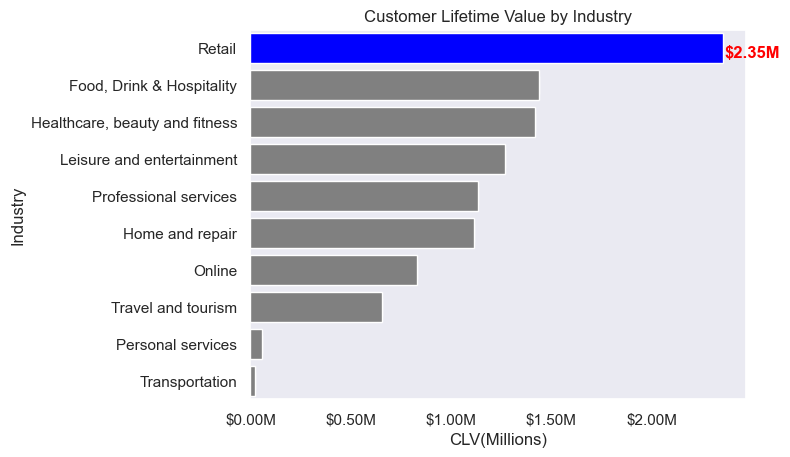

In [125]:
ax = cleaned_df.groupby('sub_group')['customer_lifetime_val'].sum().sort_values().plot(kind='barh')

ax.set_yticklabels(cleaned_df.groupby('sub_group')['customer_lifetime_val'].sum().sort_values().index)

highest_val = cleaned_df.groupby('sub_group')['customer_lifetime_val'].sum().sort_values().max()

highest_index = cleaned_df.groupby('sub_group')['customer_lifetime_val'].sum().sort_values().idxmax()

colors = ['blue' if i == highest_index else 'gray' for i in cleaned_df.groupby('sub_group')['customer_lifetime_val'].sum().sort_values().index]

ax.barh(cleaned_df.groupby('sub_group')['customer_lifetime_val'].sum().sort_values().index, cleaned_df.groupby('sub_group')['customer_lifetime_val'].sum().sort_values(), color=colors)

for i, v in enumerate(cleaned_df.groupby('sub_group')['customer_lifetime_val'].sum().sort_values()):
    if v == highest_val:
        ax.text(v+1e4, i-.25, '${:,.2f}M'.format(v/1e6), color='red', fontweight='bold')

ax.grid(visible=False)
ax.set_xticklabels(['${:,.2f}M'.format(x/1e6) for x in ax.get_xticks()])
plt.title("Customer Lifetime Value by Industry")
plt.ylabel("Industry")
plt.xlabel("CLV(Millions)")


In [134]:
retail_df = cleaned_df[cleaned_df['sub_group'] == 'Retail']

total_clv_retail = cleaned_df.groupby('sub_group')['customer_lifetime_val'].sum().Retail

In [142]:
by_city

,city,customer_lifetime_val
0,Cape Town,0.644893
1,Johannesburg,0.219854
2,Woodstock,0.020947
3,Pretoria,0.017688
4,Durban,0.015404
5,Randburg,0.013432
6,Springbok,0.009512
7,Kuilsriver,0.009175
8,Hermanus,0.007777
9,Grahamstown,0.007677


In [146]:
by_city = (retail_df.groupby('city')['customer_lifetime_val'].sum().sort_values(ascending = False)/ total_clv_retail).reset_index()

others_clv = 0
for clv in by_city['customer_lifetime_val']:
     if clv < 0.20:
        others_clv += clv
cape_town_clv = by_city.iloc[0,1]  
johannesburg_clv = by_city.iloc[1,1]

In [148]:
cities = ['Cape Town','Johannesburg','Others']

clvs = [cape_town_clv,johannesburg_clv,others_clv]

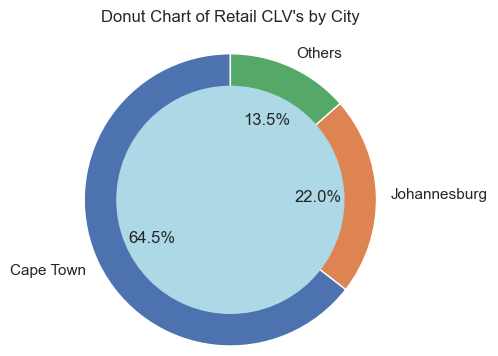

In [285]:
fig, ax = plt.subplots()
ax.pie(clvs, labels=cities, autopct='%1.1f%%', startangle=90, radius=1.29, 
       wedgeprops = {'width':0.4})
ax.set_aspect("equal")
center_circle = plt.Circle((0,0),1.0,color='lightblue', fc='lightblue',linewidth=1.25)
fig.gca().add_artist(center_circle)
plt.subplots_adjust(top=0.7)
plt.title('Donut Chart of Retail CLV\'s by City',y=1.1)
plt.show()


### Analysing Customer Churn by Industry

In [58]:
cleaned_df['churn'].value_counts()

No     465
Yes     28
Name: churn, dtype: int64

In [206]:
churn_df = cleaned_df.groupby('sub_group')['churn' ].value_counts(normalize=True)
churn_df



sub_group                       churn
Food, Drink & Hospitality       No       0.958716
                                Yes      0.041284
Healthcare, beauty and fitness  No       0.895833
                                Yes      0.104167
Home and repair                 No       0.916667
                                Yes      0.083333
Leisure and entertainment       No       1.000000
Online                          No       0.875000
                                Yes      0.125000
Personal services               No       1.000000
Professional services           No       0.928571
                                Yes      0.071429
Retail                          No       0.946809
                                Yes      0.053191
Transportation                  No       1.000000
Travel and tourism              No       0.941176
                                Yes      0.058824
Name: churn, dtype: float64

In [210]:
churn_yes = churn_df.loc[churn_df.index.get_level_values(1) == 'Yes']
churn_yes = churn_yes.reset_index(level=1,drop=True)*100


In [220]:
churn_yes = round(churn_yes,2)
churn_yes = churn_yes.sort_values(ascending=False)

sub_group
Online                            12.50
Healthcare, beauty and fitness    10.42
Home and repair                    8.33
Professional services              7.14
Travel and tourism                 5.88
Retail                             5.32
Food, Drink & Hospitality          4.13
Name: churn, dtype: float64

In [245]:
import plotly.express as px
fig = px.bar_polar(churn_yes, r='churn', theta='sub_group', 
                  title='Churn_Rate(%) by Industry')
fig.show()


In [227]:
churn_yes = churn_yes.reset_index()

#### Mean Processing Time

In [246]:
transaction_subset['week'] = transaction_subset['created'].dt.isocalendar().week

C:\Users\USER\AppData\Local\Temp\ipykernel_3568\974118832.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, ' Mean processing times per week of the Year')

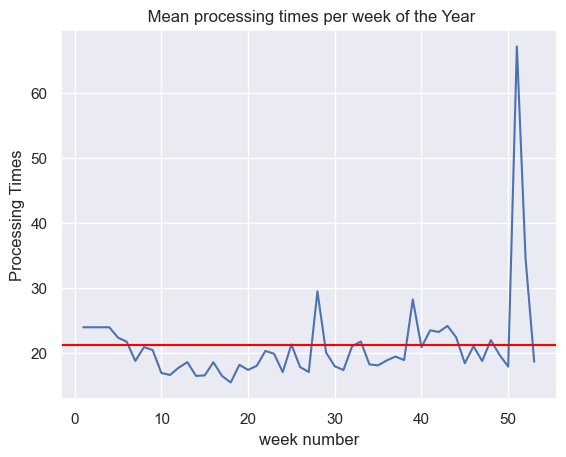

In [271]:
df = transaction_subset.groupby('week')['processing_time'].mean().reset_index()
#create line plot
plt.plot(df.week, df.processing_time)
mean_process = np.nanmean(df.processing_time)
#add horizontal line at mean value of y
plt.axhline(y=np.nanmean(df.processing_time),color= 'red',label='weekly process')
plt.ylabel('Processing Times')
plt.xlabel('week number')
plt.title(' Mean processing times per week of the Year')

In [1]:
!jupyter nbconvert Lawrence_Tech_Assessment.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Lawrence_Tech_Assessment.ipynb to slides
[NbConvertApp] Writing 846470 bytes to Lawrence_Tech_Assessment.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\USER\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\USER\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\USER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users

In [268]:
np.nanmean(df.processing_time)

21.14161155246337

In [262]:
df


,week,processing_time
0,1,23.919693
1,2,23.919693
2,3,23.919693
3,4,23.919693
4,5,22.327211
5,6,21.704979
6,7,18.738336
7,8,20.873801
8,9,20.413234
9,10,16.892948


  ### Transaction Approval Rate

In [273]:
round(transaction_subset['transaction_state'].value_counts(normalize=True)*100,2)

approved    79.69
error       10.53
aborted      7.60
declined     1.71
refunded     0.47
created      0.01
Name: transaction_state, dtype: float64

#### Credit Card Transaction Rate

In [249]:
transaction_subset['transaction_type'].value_counts(normalize=True)

credit_card    0.949120
cash           0.041458
refund         0.009422
Name: transaction_type, dtype: float64

### Average Transactions per week

In [250]:
len(transaction_subset)/7

2198.4285714285716

In [276]:
df = transaction_subset.groupby('week')['transaction_uuid'].count().reset_index()
df

,week,transaction_uuid
0,1,5
1,2,32
2,3,32
3,4,33
4,5,37
5,6,40
6,7,52
7,8,40
8,9,23
9,10,34


Text(0.5, 1.0, ' Number of weekly transactions per year')

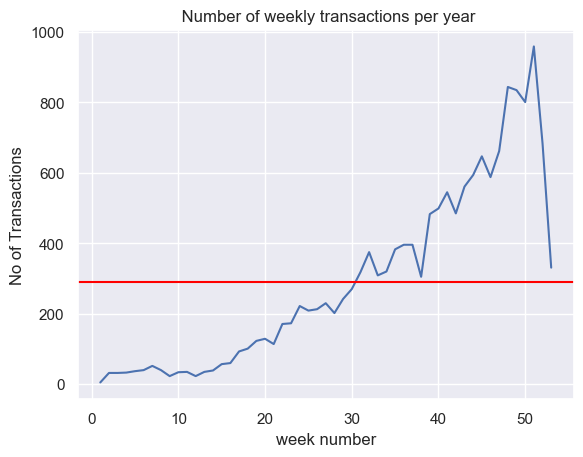

In [279]:
#create line plot
plt.plot(df.week, df.transaction_uuid)
mean_process = np.nanmean(df.transaction_uuid)
#add horizontal line at mean value of y
plt.axhline(y=np.nanmean(df.transaction_uuid),color= 'red',label='weekly process')
plt.ylabel('No of Transactions')
plt.xlabel('week number')
plt.title(' Number of weekly transactions per year')

In [278]:
np.nanmean(df.transaction_uuid)

290.35849056603774